## This script contains the following contents:
### 1. Create a Subset through random sampling
### 2. Plot a histogram
### 3. Create new column:Loyalty Flag
### 4. Plot line chart
### 5. Plot scatterplot

In [1]:
# Import libraries and visualilization libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\ksmak\Desktop\CareerFoundary\Ex4.10_Instacart Basket_Kimsan Mak'

In [5]:
# Import pickle file

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Working Data', 'df_all.pkl'))

### 1. Creating a subset of the dataframe through random sampling. This will reduce RAM needed for executing the code

In [6]:
# Creat a list holding True/False values to the test

np.random.seed(4)
dev = np.random.rand(len(df_all)) <=0.7

In [7]:
# Store 70% of the sample in the dataframe big

big = df_all[dev]

In [8]:
# Store 30% of the sample in the dataframe small

small = df_all[~dev]

In [ ]:
# example of use: df_all_trend = small[['age', 'date_joined']]

In [49]:
small.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order_x,product_name,...,gender,state,age,date_joined,dependants,family_status,income,_merge,region,low_activity_flag
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,Male,Idaho,57,2020-02-06,3,married,98119,both,West,False
2,132412,33120,1,1,202279,6,5,9,30.0,Organic Egg Whites,...,Male,Idaho,57,2020-02-06,3,married,98119,both,West,False
3,2808715,33120,1,1,202279,5,5,13,9.0,Organic Egg Whites,...,Male,Idaho,57,2020-02-06,3,married,98119,both,West,False
6,132412,28985,7,1,202279,6,5,9,30.0,Michigan Organic Kale,...,Male,Idaho,57,2020-02-06,3,married,98119,both,West,False
10,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,Male,Idaho,57,2020-02-06,3,married,98119,both,West,False


### 2. Plot histogram
#### Question 3: Create a histogram of the "order_time_24h" column

Text(0.5, 0, 'Order Time')

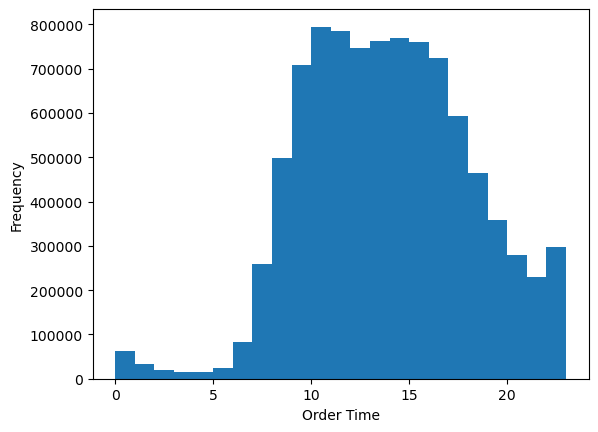

In [24]:
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Plotting a histogram
hist1 = small['order_time_24h'].plot.hist(bins = 23)
plt.xlabel ('Order Time')

In [25]:
# Save or export figure in jpg, png... using figure.savefig()

hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time_24h.png'))

#### The histogram shows that the busiest order times are between 9 and 16h

In [26]:
# Check frequency on "order_time_24h"

df_all['order_time_24h'].value_counts(dropna = False)

order_time_24h
10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: count, dtype: int64

### 3. Create new column:loyalty flag
#### Question 4: Creat a bar chart using the "loyalty_flag"

Text(0.5, 1.0, 'Distribution of Customer Loyalty')

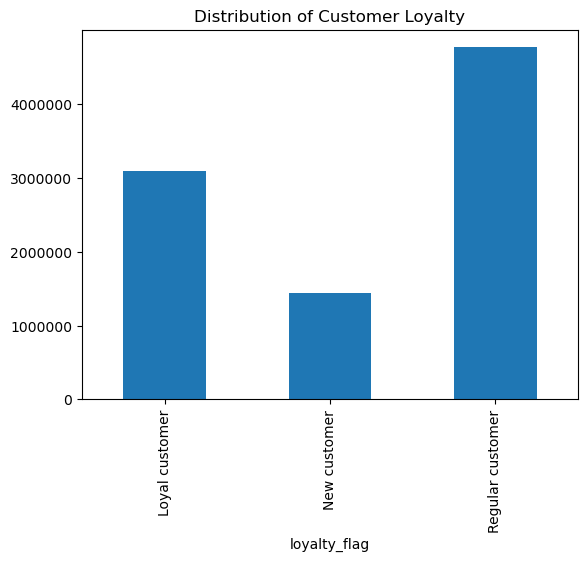

In [28]:
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')


#  Create bar chart sort by decending values (based on sorting the indexes)
bar1 = small['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Customer Loyalty')

In [29]:
# Save or export figure in jpg, png... using figure.savefig()

bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty.png'))

### 4. Plot line chart
#### Question 5: Create line chart based on expenditure ("prices" column) and the order_time_24

In [38]:
small.columns.tolist()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'user_id',
 'order_number',
 'order_day_of_week',
 'order_time_24h',
 'days_since_prior_order_x',
 'product_name',
 'department_id',
 'prices_x',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_prices',
 'spending_flag',
 'median_dspo',
 'purchased_frequency',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependants',
 'family_status',
 'income',
 '_merge',
 'region',
 'low_activity_flag']

In [ ]:
# Create line chart

line = sns.lineplot(data = small, x = 'order_time_24h',y = 'prices_x')

# Add a title
plt.title('Prices Over Time')

# Customize x-axis ticks
plt.gca().set_xticks(1)  # Set custom tick positions 

In [57]:
# Save or export figure in jpg, png... using figure.savefig()

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_time_24h.png'))

### Create line chart based on department_id and the order_time_24

In [40]:
column_values = small['department_id'].tolist()

In [44]:
small.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order_x,department_id,prices_x,max_order,mean_prices,median_dspo,age,date_joined,dependants,income
count,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,8.790702e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9288468,9.288468e+06,9.288468e+06
mean,1.710123e+06,2.559880e+04,8.363684e+00,6.059179e-01,1.029128e+05,1.782841e+01,2.740666e+00,1.341043e+01,1.081145e+01,9.921583e+00,7.788657e+00,3.441926e+01,7.790760e+00,9.957764e+00,4.947153e+01,2018-08-16 14:04:48.385466880,1.501770e+00,9.967947e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,2017-01-01 00:00:00,0.000000e+00,2.590300e+04
25%,8.549540e+05,1.356000e+04,3.000000e+00,0.000000e+00,5.139500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.000000e+00,4.200000e+00,1.400000e+01,7.385075e+00,6.000000e+00,3.300000e+01,2017-10-22 00:00:00,1.000000e+00,6.728500e+04
50%,1.710566e+06,2.528300e+04,6.000000e+00,1.000000e+00,1.025510e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,9.000000e+00,7.400000e+00,2.800000e+01,7.812676e+00,7.000000e+00,4.900000e+01,2018-08-16 00:00:00,2.000000e+00,9.676500e+04
75%,2.565074e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.543800e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.600000e+01,1.120000e+01,4.800000e+01,8.224948e+00,1.250000e+01,6.500000e+01,2019-06-09 00:00:00,3.000000e+00,1.281052e+05
max,3.421083e+06,4.968800e+04,1.440000e+02,1.000000e+00,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,2.100000e+01,2.500000e+01,9.900000e+01,1.940000e+01,3.000000e+01,8.100000e+01,2020-04-01 00:00:00,3.000000e+00,5.939010e+05
std,9.875450e+05,1.407747e+04,7.133848e+00,4.886527e-01,5.946778e+04,1.762280e+01,2.089522e+00,4.249219e+00,8.578995e+00,6.281545e+00,4.239136e+00,2.488823e+01,7.216770e-01,6.666629e+00,1.848738e+01,NaN,1.118784e+00,4.316615e+04


C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


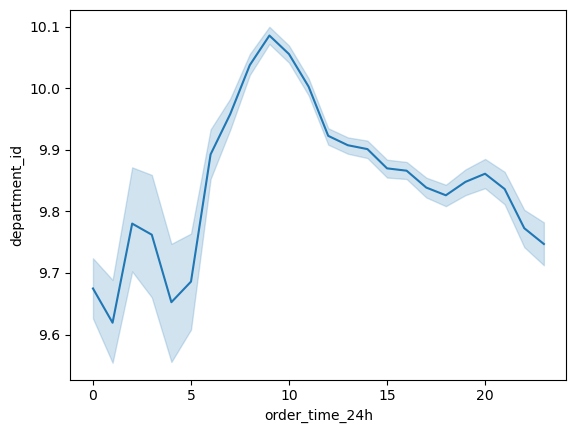

In [34]:
# Create line chart

line = sns.lineplot(data = small, x = 'order_time_24h',y = 'department_id')

In [5]:
# Save or export figure in jpg, png... using figure.savefig()

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_time_24h vs department_id.png'))

### Create line chart based on age and the order_time_24

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


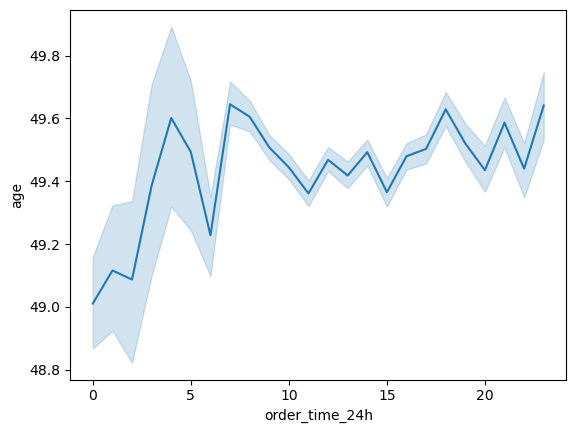

In [45]:
# Create line chart

line = sns.lineplot(data = small, x = 'order_time_24h',y = 'age')

In [47]:
# Save or export figure in jpg, png... using figure.savefig()

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'small_line_order_time_24h vs age.png'))

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


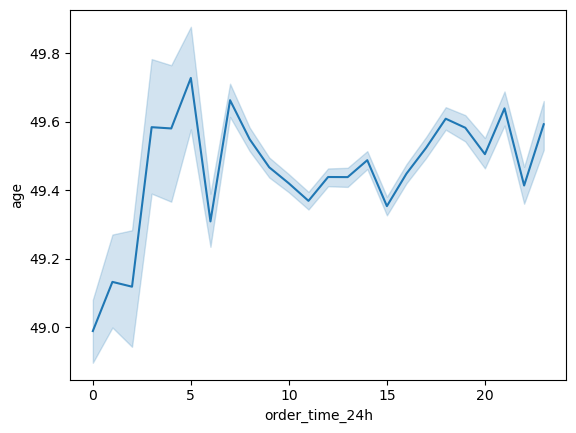

In [46]:
# Create line chart

line = sns.lineplot(data = big, x = 'order_time_24h',y = 'age')

In [48]:
# Save or export figure in jpg, png... using figure.savefig()

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'big_line_order_time_24h vs age.png'))

### Question 6: create a line chart using age and number of dependants

In [ ]:
# Create line chart and plot title

line = sns.lineplot(data = df_all, x = 'age',y = 'dependants')
plt.title ('Connection between age and number of dependants')

#### The line chart does not show any pattern of connection between age and number of dependants. 

In [63]:
# Save or export figure in jpg, png... using figure.savefig()

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

### 5. Plot scatterplot

### Question 7: Check for the relationship between age and spending power (income)

Text(0.5, 1.0, 'Correlation between Age and Income')

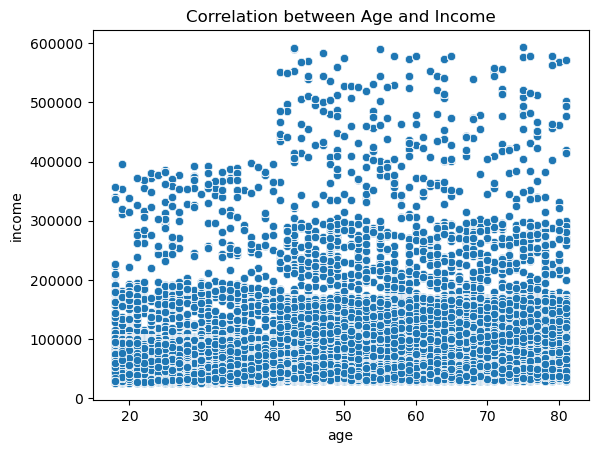

In [51]:
# Create scatterplot andplot title

scatter1 = sns.scatterplot(x = 'age', y = 'income',data = small)
plt.title ('Correlation between Age and Income')


#### Although there is no clear correlation between age and income, one can see that age 40 is the threshold to earn incomes higher than 400,000 per year.

In [74]:
# Save or export figure in jpg, png... using figure.savefig()

scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_vs_income.png'))